In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import numpy as np

# Scikit-learn

## regression

In [38]:
salaries = pd.read_csv('salary_data.csv')
salaries

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [39]:
X = salaries[['YearsExperience']].to_numpy()
Y = salaries[['Salary']].to_numpy()

In [40]:
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression()

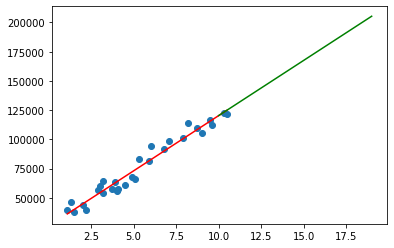

In [41]:

plt.scatter(X, Y)
plt.plot(X, model.predict(X), 'r')
new_data = np.arange(10, 20).reshape(-1, 1)
plt.plot(new_data, model.predict(new_data), 'g')

## model score

In [42]:
r_squered = model.score(X, Y)

In [43]:
r_squered

0.9569566641435086

## Logistic regression

In [17]:
emails = pd.read_csv('email_offer.csv')
emails

,Age,Gender,TookAction
0,38,Female,0
1,32,Female,0
2,46,Male,1
3,34,Male,0
4,40,Male,0
...,...,...,...
95,31,Male,0
96,49,Male,1
97,36,Male,0
98,32,Female,0


<AxesSubplot:xlabel='Age', ylabel='TookAction'>

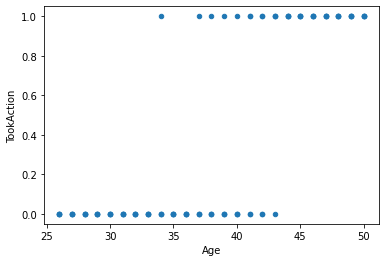

In [19]:
emails.plot.scatter('Age', 'TookAction')

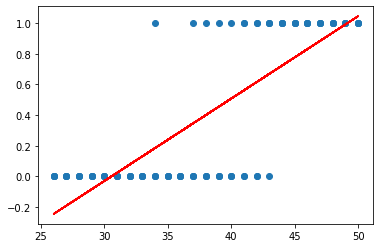

In [44]:
model = linear_model.LinearRegression()
model.fit(emails[['Age']], emails['TookAction'])
lr_predict = model.predict(emails[['Age']])
plt.scatter(emails['Age'], emails['TookAction'])
plt.plot(emails['Age'], lr_predict, 'r')

In [45]:
X = emails[['Age', 'Gender']]
y = emails['TookAction']
model = linear_model.LogisticRegression()
model.fit(X, y)

ValueError: could not convert string to float: 'Female'

In [48]:
emails['Male'] = pd.get_dummies(emails['Gender'], drop_first=True)

In [50]:
emails = emails[['Age', 'Gender', 'TookAction', 'Male']]
emails

,Age,Gender,TookAction,Male
0,38,Female,0,0
1,32,Female,0,0
2,46,Male,1,1
3,34,Male,0,1
4,40,Male,0,1
...,...,...,...,...
95,31,Male,0,1
96,49,Male,1,1
97,36,Male,0,1
98,32,Female,0,0


In [59]:
X = emails[['Age', 'Male']]
y = emails['TookAction']

model = linear_model.LogisticRegression()
model.fit(X, y)

emails['pred'] = model.predict(X)
emails

C:\Users\Robotux\AppData\Local\Temp\ipykernel_20788\176111030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails['pred'] = model.predict(X)


,Age,Gender,TookAction,Male,pred
0,38,Female,0,0,0
1,32,Female,0,0,0
2,46,Male,1,1,1
3,34,Male,0,1,0
4,40,Male,0,1,1
...,...,...,...,...,...
95,31,Male,0,1,0
96,49,Male,1,1,1
97,36,Male,0,1,0
98,32,Female,0,0,0


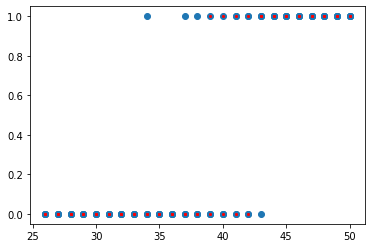

In [65]:
# emails.plot.scatter('Age', 'TookAction')
plt.scatter(emails['Age'], emails['TookAction'])
plt.scatter(emails['Age'], emails['pred'], c='r', s=3 )

In [66]:
model.score(X, y)

0.94

## train test split

In [67]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 )

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [75]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_train)

model.score(X_train, y_train)

0.9285714285714286

In [76]:
model.score(X_test, y_test) # predictions_test = model.predict(X_test)

0.9

## Metrics

![](https://miro.medium.com/max/693/1*7EYylA6XlXSGBCF77j_rOA.png)

![](https://miro.medium.com/max/332/0*dh9DQi6-yMo3VGBT.png)

In [80]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


In [79]:
y_test_pred = model.predict(X_test)

metrics.confusion_matrix(y_test, y_test_pred )

array([[16,  3],
       [ 0, 11]], dtype=int64)

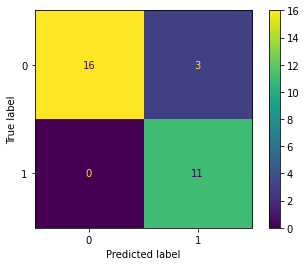

In [81]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)